In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/polished2.csv")

In [3]:
medal_rate = df.groupby('Sport').apply(lambda df: df[df["Won Medal"] == True].shape[0] / df.shape[0]).sort_values()
medal_rate

C:\Users\Rafael\AppData\Local\Temp\ipykernel_13136\4180724327.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medal_rate = df.groupby('Sport').apply(lambda df: df[df["Won Medal"] == True].shape[0] / df.shape[0]).sort_values()


Sport
Golf                     0.037037
Triathlon                0.057034
Gymnastics               0.063543
Shooting                 0.074656
Tennis                   0.086155
Table Tennis             0.091112
Cycling                  0.108682
Archery                  0.109400
Athletics                0.112683
Badminton                0.113069
Modern Pentathlon        0.121525
Beach Volleyball         0.126394
Swimming                 0.132403
Sailing                  0.139214
Equestrianism            0.145618
Judo                     0.156269
Diving                   0.158130
Boxing                   0.162274
Fencing                  0.169650
Weightlifting            0.178884
Wrestling                0.186464
Canoeing                 0.187568
Trampolining             0.194631
Rhythmic Gymnastics      0.201626
Taekwondo                0.241611
Football                 0.243979
Rugby Sevens             0.249158
Synchronized Swimming    0.252061
Rowing                   0.270090
Basketba

In [6]:
df = df.merge(medal_rate.rename('Medal Rate'), on='Sport')
df.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,medal_rate,Medal Rate
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,False,24.691358,0.272628,0.272628
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,False,20.761246,0.156269,0.156269
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal,False,23.661439,0.113069,0.113069
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,0.139214,0.139214
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,0.139214,0.139214


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

features = ["Age", "Sex", "Height", "BMI", "NOC", "Medal Rate"]
target = ["Won Medal"]

def get_f1_score(df):
    X = df[features].copy()
    le = LabelEncoder()
    X["NOC"] = le.fit_transform(X["NOC"])
    X = pd.get_dummies(X, columns=["Sex"], drop_first=True)
    
    y = df[target].values.ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    return f1_score(y_test, y_pred)

f1_scores = df.groupby("Sport").apply(get_f1_score)

print(f1_scores)


Sport
Archery                  0.222222
Athletics                0.293839
Badminton                0.207792
Baseball                 0.765957
Basketball               0.720588
Beach Volleyball         0.086957
Boxing                   0.173010
Canoeing                 0.437262
Cycling                  0.255875
Diving                   0.516854
Equestrianism            0.306785
Fencing                  0.299611
Football                 0.500000
Golf                     0.000000
Gymnastics               0.283019
Handball                 0.524520
Hockey                   0.497373
Judo                     0.170000
Modern Pentathlon        0.256410
Rhythmic Gymnastics      0.482759
Rowing                   0.394221
Rugby Sevens             0.717949
Sailing                  0.217054
Shooting                 0.142222
Softball                 0.837209
Swimming                 0.510791
Synchronized Swimming    0.586207
Table Tennis             0.485437
Taekwondo                0.290909
Tennis  

C:\Users\Rafael\AppData\Local\Temp\ipykernel_13136\2374619990.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  f1_scores = df.groupby("Sport").apply(get_f1_score)


C:\Users\Rafael\AppData\Local\Temp\ipykernel_13136\323820401.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Golf'),
 Text(1, 0, 'Triathlon'),
 Text(2, 0, 'Beach Volleyball'),
 Text(3, 0, 'Shooting'),
 Text(4, 0, 'Judo'),
 Text(5, 0, 'Boxing'),
 Text(6, 0, 'Badminton'),
 Text(7, 0, 'Sailing'),
 Text(8, 0, 'Archery'),
 Text(9, 0, 'Tennis'),
 Text(10, 0, 'Cycling'),
 Text(11, 0, 'Modern Pentathlon'),
 Text(12, 0, 'Gymnastics'),
 Text(13, 0, 'Taekwondo'),
 Text(14, 0, 'Wrestling'),
 Text(15, 0, 'Athletics'),
 Text(16, 0, 'Fencing'),
 Text(17, 0, 'Equestrianism'),
 Text(18, 0, 'Weightlifting'),
 Text(19, 0, 'Rowing'),
 Text(20, 0, 'Canoeing'),
 Text(21, 0, 'Rhythmic Gymnastics'),
 Text(22, 0, 'Table Tennis'),
 Text(23, 0, 'Hockey'),
 Text(24, 0, 'Football'),
 Text(25, 0, 'Swimming'),
 Text(26, 0, 'Diving'),
 Text(27, 0, 'Handball'),
 Text(28, 0, 'Volleyball'),
 Text(29, 0, 'Water Polo'),
 Text(30, 0, 'Synchronized Swimming'),
 Text(31, 0, 'Trampolining'),
 Text(32, 0, 'Rugby Sevens'),
 Text(33, 0, 'Basketball'),
 Text(34, 0, 'Baseball'),
 Text(35, 0, 'Softball')]

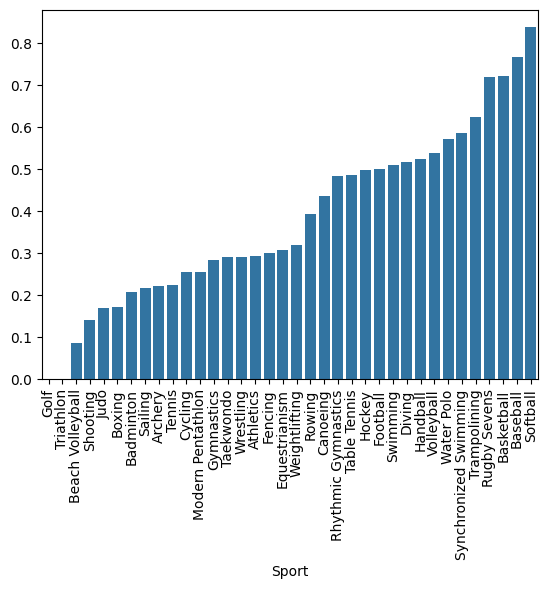

In [13]:
f1_scores.sort_values(inplace=True)
plot = sns.barplot(f1_scores)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [18]:
f1_scores_df = f1_scores.reset_index()
f1_scores_df.columns = ['Sport', 'F1 Score']

merged_df = pd.merge(f1_scores_df, df[['Sport', 'Medal Rate']].drop_duplicates(), on='Sport')

merged_df['Explicability'] = merged_df['F1 Score'] / (1 - merged_df['Medal Rate'])

print(merged_df)


                    Sport  F1 Score  Medal Rate  Explicability
0                    Golf  0.000000    0.037037       0.000000
1               Triathlon  0.000000    0.057034       0.000000
2        Beach Volleyball  0.086957    0.126394       0.099537
3                Shooting  0.142222    0.074656       0.153697
4                    Judo  0.170000    0.156269       0.201486
5                  Boxing  0.173010    0.162274       0.206524
6               Badminton  0.207792    0.113069       0.234282
7                 Sailing  0.217054    0.139214       0.252158
8                 Archery  0.222222    0.109400       0.249520
9                  Tennis  0.224490    0.086155       0.245654
10                Cycling  0.255875    0.108682       0.287074
11      Modern Pentathlon  0.256410    0.121525       0.291881
12             Gymnastics  0.283019    0.063543       0.302223
13              Taekwondo  0.290909    0.241611       0.383588
14              Wrestling  0.291667    0.186464       0

C:\Users\Rafael\AppData\Local\Temp\ipykernel_13136\2334156560.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Golf'),
 Text(1, 0, 'Triathlon'),
 Text(2, 0, 'Beach Volleyball'),
 Text(3, 0, 'Shooting'),
 Text(4, 0, 'Judo'),
 Text(5, 0, 'Boxing'),
 Text(6, 0, 'Badminton'),
 Text(7, 0, 'Tennis'),
 Text(8, 0, 'Archery'),
 Text(9, 0, 'Sailing'),
 Text(10, 0, 'Cycling'),
 Text(11, 0, 'Modern Pentathlon'),
 Text(12, 0, 'Gymnastics'),
 Text(13, 0, 'Athletics'),
 Text(14, 0, 'Wrestling'),
 Text(15, 0, 'Equestrianism'),
 Text(16, 0, 'Fencing'),
 Text(17, 0, 'Taekwondo'),
 Text(18, 0, 'Weightlifting'),
 Text(19, 0, 'Table Tennis'),
 Text(20, 0, 'Canoeing'),
 Text(21, 0, 'Rowing'),
 Text(22, 0, 'Swimming'),
 Text(23, 0, 'Rhythmic Gymnastics'),
 Text(24, 0, 'Diving'),
 Text(25, 0, 'Football'),
 Text(26, 0, 'Hockey'),
 Text(27, 0, 'Handball'),
 Text(28, 0, 'Volleyball'),
 Text(29, 0, 'Trampolining'),
 Text(30, 0, 'Synchronized Swimming'),
 Text(31, 0, 'Water Polo'),
 Text(32, 0, 'Rugby Sevens'),
 Text(33, 0, 'Basketball'),
 Text(34, 0, 'Baseball'),
 Text(35, 0, 'Softball')]

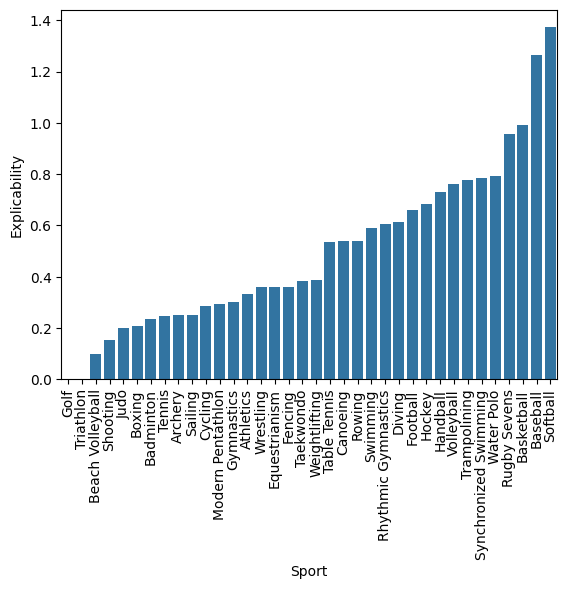

In [19]:
merged_df.sort_values(inplace=True, by="Explicability")
plot = sns.barplot(data=merged_df, x='Sport', y="Explicability")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)